# Decision trees. Tree pruning.
## Introduction.

Decision trees in machine learning are like a map where each step involves decisions based on features, ultimately leading to predictions. Trees are an important concept in simplifying complex decision-making processes for tasks like classification and regression.


![decision_tree_example](decision_tree_example.png)

## Problem
However simplicity comes with its challenges. Decision Trees are prone to over-fitting. A decision tree will always overfit the training data if we allow it to grow to its max depth. Overfitting in decision trees occurs when the tree becomes too complex and captures the noise in the training data, rather than the underlying pattern. This can lead to poor generalization performance on new unseen data.

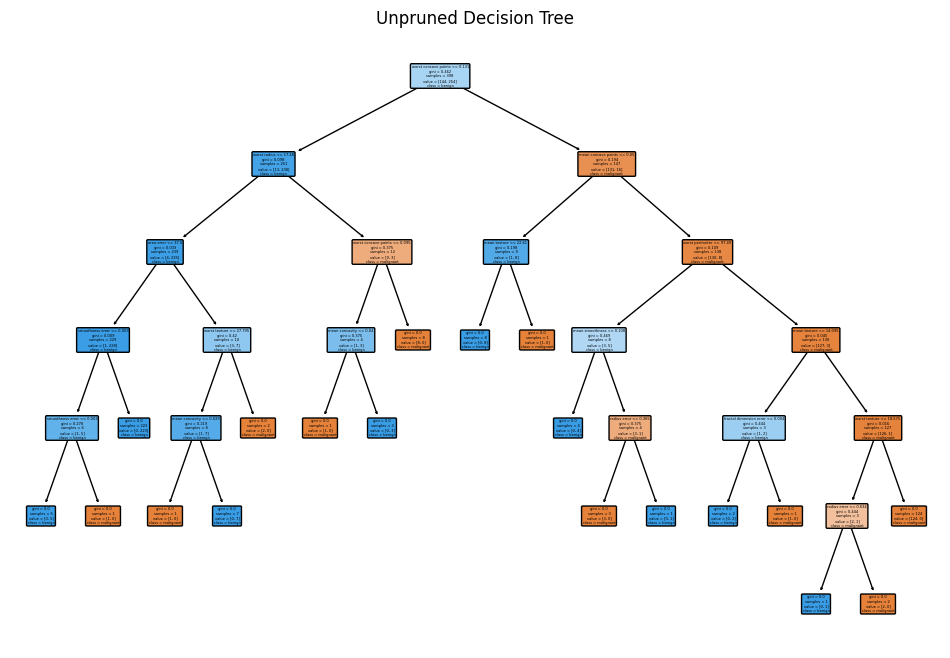

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

tree_unpruned = DecisionTreeClassifier()
tree_unpruned.fit(X_train, y_train)


y_train_pred = tree_unpruned.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = tree_unpruned.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(12, 8))
plot_tree(tree_unpruned, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, rounded=True)
plt.title("Unpruned Decision Tree")
plt.show()

## Solution
#### A way to avoid overfitting in decision trees is Pruning

In decision trees, pruning refers to the process of removing branches that do not provide much information gain or that are not necessary for the tree to make accurate predictions. The goal of pruning is to simplify the tree and make it more generalizable to new unseen data.


![Before_after_pruning](Before_after_pruning.png)

### There are two main approaches in tree pruning.

+ #####  Pre-pruning
+ #####  Post-pruning


To understand the difference between these two let’s imagine that you have built up your decision tree and it’s fully functional and ready to use. Then you go and analyze your decision tree and you notice some weak and unnecessary branches so you decide on removing these branches. This step is called post-pruning because you decided to remove these branches after the decision tree is complete. 

On the other hand, pre-pruning is when you stop the decision tree from branching. If you see that the branch will not add the value and will only increase the complexity of the decision tree

## Pre-pruning

We usually apply this technique before the construction of a decision tree. This is the process of early stopping the tree-growing process before it reaches its maximum depth. The tree is stopped from growing by setting a stopping condition, such as a maximum depth or a minimum number of samples in a leaf node.

### Pre-pruning has two methods:


+ ##### Maximum Depth (Depth Limit)
+ ##### Minimum Samples per Leaf

### Maximum depth method:

The maximum depth parameter is a pre-pruning technique that limits the depth of the decision tree. The depth of a tree is the length of the longest path from the root to a leaf. By setting a maximum depth, you control the tree's complexity and prevent it from becoming too intricate, which can lead to overfitting.


#### How does it work:

1. ##### The algorithm grows the tree by making decisions based on features until it reaches the specified maximum depth.
2. ##### Once the tree reaches this depth, it stops splitting nodes and becomes a complete decision tree.



#### Usage:

Setting an appropriate maximum depth is crucial. If the depth is too shallow, the tree may be too simple and fail to capture the underlying patterns in the data. If it's too deep, the tree might overfit and not generalize well to new, unseen data.

#### Example

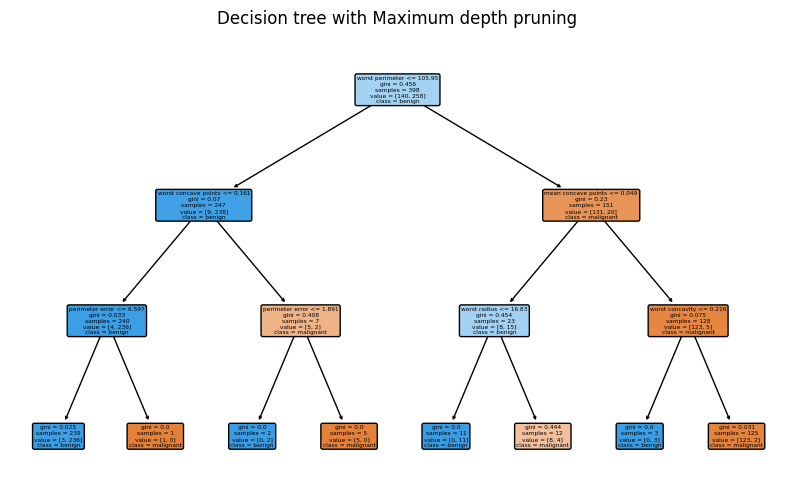

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

prunned_tree = DecisionTreeClassifier(max_depth=3)
prunned_tree.fit(X_train, y_train)


y_train_pred = prunned_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = prunned_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
plot_tree(prunned_tree, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, rounded=True)
plt.title("Decision tree with Maximum depth pruning")
plt.show()

##### __*max_depth*__: 
In ```DecisionTreeClassifier(max_depth=3)```
__*max_depth*__ parameter controls the maximum depth of the tree. The deeper the tree, the more complex the model. A deeper tree can fit the training data better, but it can also lead to overfitting. In order to prevent overfitting, we can limit the depth of the tree by setting a maximum value for max_depth.

### Minimum Samples per Leaf:


The minimum samples per leaf is another pre-pruning technique that controls the minimum number of samples required for a node to be considered a leaf. A leaf node is a terminal node in a decision tree where a final prediction or decision is made.

#### How does it work:

1. ##### As the tree grows, when a potential split is considered, the algorithm checks if each resulting child node (after the split) would have at least the specified minimum number of samples.
2. ##### If a node has fewer samples than the specified minimum, the split is not performed, and the node becomes a leaf.

   

#### Usage:
This parameter helps prevent the creation of nodes with very few samples, which might capture noise in the data. By setting a minimum sample per leaf, you ensure that each leaf node has enough data points to make a reliable prediction.

#### Example

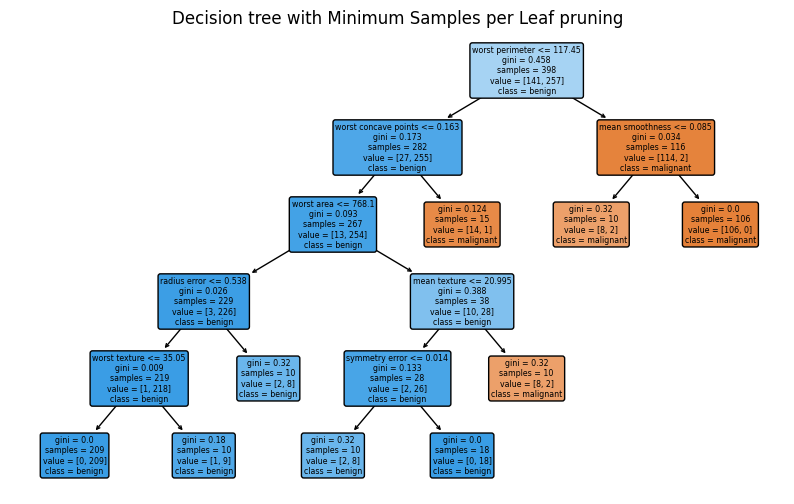

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

prunned_tree = DecisionTreeClassifier(min_samples_leaf=10)
prunned_tree.fit(X_train, y_train)


y_train_pred = prunned_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = prunned_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
plot_tree(prunned_tree, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, rounded=True)
plt.title("Decision tree with Minimum Samples per Leaf pruning")
plt.show()

##### __*min_samples_leaf*__ : 
In ```DecisionTreeClassifier(min_samples_leaf=10)``` __*min_samples_leaf*__ parameter controls the minimum number of samples that are required to be at a leaf node. A leaf node is a node that has no children. By setting a minimum number of samples required at a leaf node, we can prevent the tree from creating overfitting by creating branches with very few samples.

## Post-pruning
It is also known as backward pruning. The Post-pruning technique allows the decision tree model to grow to its full depth, then removes the tree branches that do not provide a significant increase in accuracy on the validation set to prevent the model from overfitting. The process of post-pruning typically involves removing a node and its children from the tree, and then evaluating the impact on the accuracy of the tree using a validation set. If the accuracy does not decrease significantly, the node and its children are removed permanently. This process is repeated recursively for each node in the tree, starting from the bottom-most leaf nodes and moving upwards.

### Post-pruning has two methods of pruning:
+ ##### Cost-Complexity Pruning (CCP)
+ ##### Reduced Error Pruning (REP)

### Cost-Complexity Pruning:

Cost-Complexity Pruning is a post-pruning method for decision trees. It involves growing the tree to its maximum size and then selectively pruning branches based on a cost-complexity parameter.


#### How does it work:

1. ##### First of all for each subtree, calculate a measure of impurity, often using Gini impurity or entropy.
2. ##### Then, introduce a cost-complexity parameter that balances the accuracy and complexity of the tree. The cost-complexity is proportional to the number of nodes in the subtree.
3. ##### Compute the total cost by adding the impurity measure and the cost-complexity term.
4. ##### Iteratively prune branches with the smallest increase in total cost. This process continues until the optimal level of pruning is achieved.


#### Usage:

Cost-Complexity Pruning is suitable when a trade-off between tree complexity and accuracy is desired.
It helps prevent overfitting and improves the tree's ability to generalize to unseen data.
The cost-complexity parameter allows fine-tuning based on the specific requirements of the problem.

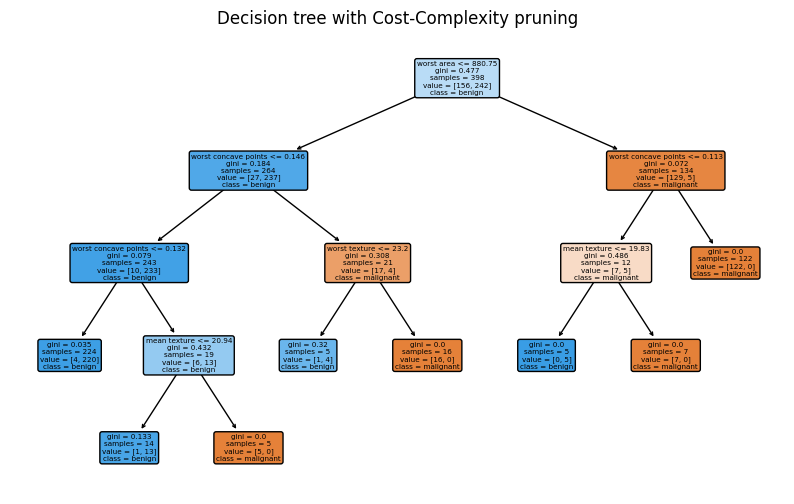

In [69]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

prunned_tree = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
prunned_tree.fit(X_train, y_train)


y_train_pred = prunned_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


y_test_pred = prunned_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
plot_tree(prunned_tree, filled=True, feature_names=breast_cancer.feature_names, class_names=breast_cancer.target_names, rounded=True)
plt.title("Decision tree with Cost-Complexity pruning")
plt.show()

In summary, decision tree pruning is crucial in machine learning. It helps strike the right balance between model complexity and accuracy, making our models more robust and useful for various tasks.

##### Here are some benefits of pruning

1. Reduced overfitting: Pruning helps the decision tree generalize better to unseen data.
2. Improved interpretability: A pruned tree is often simpler and easier to interpret.
3. Reduced computational complexity: Simpler trees require fewer computational resources for prediction.